# Popular Data Science Questions

The ACME Corporation is looking for new content regarding our recent decision to create books, on-line articles, or videos in the field of data science.  This analysis will help us determine what is the best content to get started with.  We have determined to analyze the most popular questions on the question and answer on-line forum known as Stack Exhchange.

## Stack Exchange

Stack Exchange is a web site where users can ask and answer questions from other users of the site.  The site is organized various topics, such as Data Science.

The site allows users to rate the quality of the questions asked.  The higher rated questions appear near the top of the list of questions to highlight quality questions.  Users can also rate the answers and the highest rated answer is highlighted after the question.

The [Data Science](https://datascience.stackexchange.com) Stack Exchange web site allows questions and answers for Data Science professionals, Machine Learning specialists, and individuals who wish to learn more about data science.

### What kinds of questions are accepted?

According to the Data Science Stack Exchange help center's [asking questions FAQ](https://datascience.stackexchange.com/help/asking), the following guidelines should be followed:
* Avoid asking subjective questions
* Avoid asking duplicate questions (duplicate questions are flagged accordingly)
* Ask only relavant and appropriate questions in regards to data science
    * For instance, asking questions regarding programming without reference to data is should be asked in the [Stack Overflow](https://stackoverflow.com) forum instead of stack exchange.
* Ask specific questions
* Make questions relavant to others

All of these characteristics should be helpful in our analysis.

The help center's page also refers several sites that may be of relevance to our analysis:
* [Open Data](https://opendata.stackexchange.com/) for dataset requests
* [Computational Science](https://scicomp.stackexchange.com/) for software packages and algorithms in applied mathematics

### How are questions subdivided?

On the [home](https://datascience.stackexchange.com/) page, there are four sections:
* [Questions](https://datascience.stackexchange.com/questions) - list of all questions asked
* [Tags](https://datascience.stackexchange.com/tags) - list of tags (keywords or labels that categorize questions). Users can also assign "Tags" to each question to make it easier to search for and organize questions by topic.
* [Users](https://datascience.stackexchange.com/users) - list of registered users on Stack Exchange
* [Unanswered](https://datascience.stackexchange.com/unanswered) - list of unanswered questions

The tagging system used by Stack Exchange could be helpful in our analysis as it will allow us to quantify how many questions were asked about a particular subject.

The questions in the Stack Exhange's sites are heavily moderated by the community, which will give us confidence in the validity of the tagging system and provide us with accurate conclusions.

### What information is available in each post?

For both questions and answers:
* Rating or score (as a numerical value; higher the number, higher the rating)
* Title
* Author
* Body of post

For questions only:
* Last time the question was active
* How many times the question was viewed
* Related questions
* Tags associated with the question

## Stack Exchange Data Explorer

Stack exchange provides a public interface to query data for any of Stack Exchange's web sites.  [This](https://data.stackexchange.com/datascience/query/new) link provides a means to query and explore Stack Exchange's Data Science database.

Using the Stack Exchange Data Explorer, there are a few tables that may be relevant to our analysis:
* Posts - containing details of the actual post
* PostTags - associate tags with a particular post
* Tags - contains the number of times a tag is used for a particular post
* TagSynonyms - contains the different variations of a particular tag

## Getting the Data

Below are some definitions of the fields in the Posts table that are relevant to our analysis:

* Id : identifier for the post
* PostTypeId : identifier for the type of post
* CreationDate : date and time the post was created
* Score : post's score
* ViewCount : number of times the post was viewed
* Tags : tags used to describe the content of the post
* AnswerCount : number of answers associated with the question post
* FavoriteCount : number of times the question post was favored

We are only interested in recent posts made in 2019 as to analyze current trends in data science questions.  Let's retrieve a sample of the data based on the CreationData year = 2019 and PostTypeId = 1 (1 refers to question type):

```sql
SELECT Id, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
FROM posts
WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
```

Below is a sample of the data returned:

| Id | CreationDate | Score | ViewCount | Tags | AnswerCount | FavoriteCount |
|:--:|:------------:|:-----:|----------:|------|:-----------:|:-------------:|
| 53985 | 2019-06-18 05:07:54 | 1 | 40 | logistic-regressionorangeorange3 | 0 | 0 |
| 53987 | 2019-06-18 06:37:06 | 0 | 13 | neural-networknatural-language-processngrams | 0 | |
| 53989 | 2019-06-18 06:53:20 | 0 | 26 | machine-learningsvmactive-learning | 0 | 1 |
| 53990 | 2019-06-18 06:57:15 | 0 | 25 | machine-learningfeature-selectiondata-cleaningcorrelation | 0 | |
| 53991 | 2019-06-18 06:59:37 | 1 | 138 | clustering | 1 | |



## Exploring the Data

For the purposes of this analysis, we have exported the above query into the file "2019_questions.csv".

Let's load this data into a dataframe so we can manipulate and visualize the data in Python:

In [1]:
# Let's import the Python libraries we will use:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

Let's run [questions.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) and see if it provides any quick insight into the data:

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


It looks like only 1407 values are filled in FavoriteCount out of a possible 8839.  It's probably safe to assume that a null value in this fields can count as zero.  The type stored in FavoriteCount is a float.  Again, it's probably safe to assume that the number of favorites probably only have integer values, so we'll change the data type from float to integer.

The data type for Tags shows up as an "object."  Let's investigate further as to what data type the Tags field actually is:

In [4]:
questions["Tags"].apply(lambda x: type(x)).unique()

array([<class 'str'>], dtype=object)

The tags column is a string.  On Stack Exchange, each question can only have maximum of five tags ([source](https://meta.stackexchange.com/a/18879)).  It would be too much trouble to create an individual field for 5 tags, so we'll create a comma separated list for the Tag field.

## Cleaning the Data

Let's first begin by filling in the missing values in the FavoriteCount field and convert it into an integer:

In [5]:
questions.fillna(value={"FavoriteCount" : 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


Now, let's modify the Tags field to make them easier to work with.  Each tag in the Tags field is enclosed in angle brackets with no spacing inbetween tags.  We'll just remove the brackets and save the resulting tags as a Python list object.

In [6]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
7102,54007,2019-06-18 09:46:59,3,661,"[deep-learning, pytorch]",1,0
4064,61501,2019-10-09 14:55:40,0,252,"[machine-learning, xgboost, gradient-descent]",2,0
6727,53540,2019-06-10 17:23:02,0,36,"[machine-learning, python, feature-selection, ...",1,0
1583,57641,2019-08-16 08:24:44,0,58,"[machine-learning, decision-trees, machine-lea...",4,0
4223,60992,2019-09-29 10:49:41,0,11,"[python, linear-regression]",0,0


## Most Used and Most Viewed

We are interested in the number of times a particular tag is used and viewed in the 2019 questions database.

Let's start with counting the number of times a tag is used in a question:

In [7]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

To improve the asthetics of our tag count dictionary, we'll convert it to a data frame and change the column name.  We'll print out the first few rows of our new dataset to verify the format of the data frame.

In [8]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50
python,1814
time-series,466
forecast,34
forecasting,85
scikit-learn,540


Now, we'll grab the top 20 tags used.  We'll sort the data set and grab the top 20.

In [9]:
top_tags_used = tag_count.sort_values(by="Count").tail(20)
print(top_tags_used)

                        Count
machine-learning-model    224
statistics                234
clustering                257
predictive-modeling       265
r                         268
dataset                   340
regression                347
pandas                    354
lstm                      402
time-series               466
cnn                       489
nlp                       493
scikit-learn              540
tensorflow                584
classification            685
keras                     935
neural-network           1055
deep-learning            1220
python                   1814
machine-learning         2693


Now, let's visualize the top tags used:

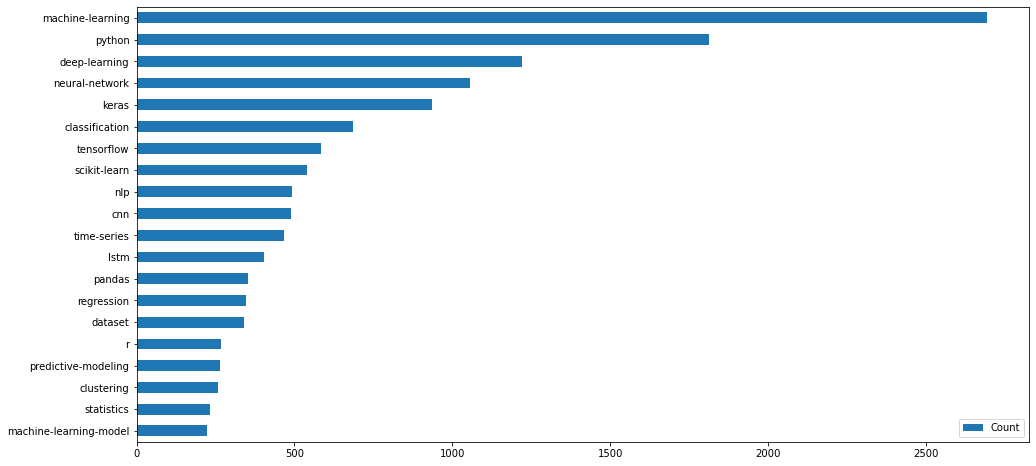

In [10]:
top_tags_used.plot(kind="barh", figsize=(16,8))

It appears as some tags include some broad subjects.  These subjects such as python and r may include some of the other tags such as machine learning within them.

Let's count the number of times a particular tag has been viewed:

In [11]:
tag_views = dict()

for i, tags in enumerate(questions["Tags"]):
    for tag in tags:
        if tag in tag_views:
            tag_views[tag] += questions["ViewCount"].iloc[i]
        else:
            tag_views[tag] = 1

The enumerate function grabs the numerical index as well as a tag as a tuple.  We can use this value to get the tag and index, so we can get the ViewCount for each tag used in different questions.

Convert tag_views into a data frame and sort by top 20 as we did with the tag_count:

In [12]:
tag_views = pd.DataFrame.from_dict(tag_views, orient="Index")
tag_views.rename(columns={0: "Views"}, inplace=True)
top_tag_views = tag_views.sort_values(by="Views").tail(20)

Let's visualize the top tags viewed:

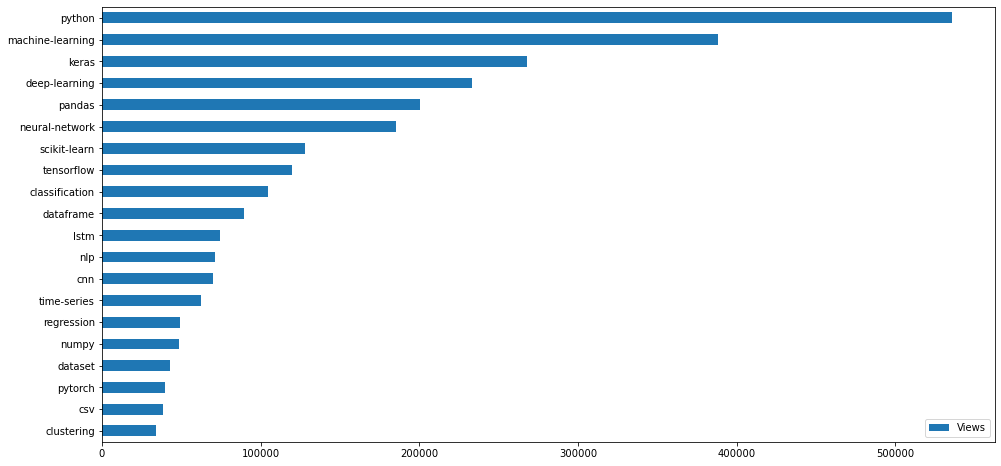

In [13]:
top_tag_views.plot(kind="barh", figsize=(16,8))

## Relationships Between Each Tag

From the top most viewed and used tags in our questions database, we see several tags that are very closely related.  For example, the python tag also encompasses the tags pytorch, numpy, and pandas.

To get an idea of how all of these tags relate to one another, we'll create a heat map that visually shows how closely related each tag is to one another.

We'll start by creating a data frame that contains all of the tags used in our questions as rows and columns.  First, we need to create a list of all tags used in the questions:

In [14]:
all_tags = list(tag_count.index)
print(len(all_tags))

526


Next, we'll create the data frame and print a small sample of it to verify correctness.

In [15]:
tag_associations = pd.DataFrame(index=all_tags, columns=all_tags)
print(tag_associations.iloc[0:5,0:5])

                  machine-learning data-mining regression linear-regression  \
machine-learning               NaN         NaN        NaN               NaN   
data-mining                    NaN         NaN        NaN               NaN   
regression                     NaN         NaN        NaN               NaN   
linear-regression              NaN         NaN        NaN               NaN   
regularization                 NaN         NaN        NaN               NaN   

                  regularization  
machine-learning             NaN  
data-mining                  NaN  
regression                   NaN  
linear-regression            NaN  
regularization               NaN  


Now, it's time to initialize the data frame with zeroes.  Then we'll increment the intervening tags by one, which will result in determining how many times each tag were used together.

In [16]:
tag_associations.fillna(value=0, inplace=True)

for tags in questions["Tags"]:
    tag_associations.loc[tags, tags] += 1

Now that we have created our tag associations data frame, we are only interested in the tags that were most used.  First, we'll create another data frame only using the tags that were most used:

In [17]:
most_used_relationships = tag_associations.loc[top_tags_used.index, top_tags_used.index]

Now, we'll do a test regarding the relationship between the tags "time-series" and "r" in yellow.  We'll also highlight the values in the top_tags_used data frame to verify that they are the same values.  Note:  these colors are only viewable using [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/).

In [18]:
def color_cells_by_CSS(x):
    helper_df = pd.DataFrame(data="", index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    
    for j in range(helper_df.shape[0]):
        helper_df.iloc[j,j] = "color: blue"
    
    return helper_df

most_used_relationships.style.apply(color_cells_by_CSS, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


To understand the relationships each tag has with each other, we'll need to create a heatmap.  We don't the values each tag has with itself to skew our heatmap, so we'll remove them.

In [19]:
for i in range(most_used_relationships.shape[0]):
    most_used_relationships.iloc[i,i] = np.NaN

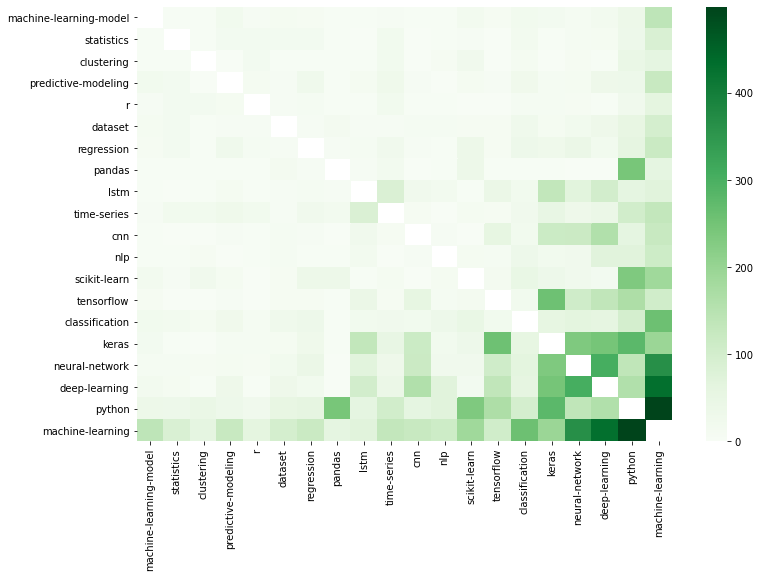

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(most_used_relationships, cmap="Greens", annot=False)

## Analysis of Relationships Between Tags

Some of the most popular tags such as Keras, TensorFlow, scikit-learn are Python libraries that allow users to make use of deep learning, which is a type of neural network.

The other tags seem to indicate an overall relationship to deep learning: machine learning, neural network, statistics.

It would seem that any new content in the space of data science should be centered around deep learning as it seems to be the most popular topic on Stack Exchange.

## Is Deep Learning Just a Fad?

Before we make an official recommendation of using deep learning as a first topic to use in our products, let's do some further analysis to determine if investing in deep learning products will benefit us over the long haul.

We need to figure out if interest in deep learning is waning.

We saved all of the questions in the Stack Exchange questions database to the file "all_questions.csv" using the following SQL query:

```sql
SELECT Id, CreationDate, Tags
FROM posts
WHERE PostTypeId = 1;
```

Now, we'll load the CSV data into a data frame so we can do our time analysis:

In [21]:
all_questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

Now, we'll convert the Tags field into a list as we did before:

In [22]:
all_questions["Tags"] = all_questions["Tags"].str.replace("^<|>$", "").str.split("><")

We need to decide which tags should be classified as being part of deep learning.

For our analysis, we'll use the following tags to help us determine interest in deep learning:
* scikit-learn
* keras
* neural-network
* deep learning
* tensorflow

We based this list from the most used tag list we made earlier and determine which ones are closely related to deep learning.

Next, let's create a function that returns a 1 if it is part of our deep learning list which we'll use to create a new column called "DeepLearning" in our data frame:

In [23]:
def IsDeepLearning(tags):
    for tag in tags:
        if tag in ["scikit-learn", "keras", "neural-network", "deep-learning", "tensorflow"]:
            return 1
    
    return 0

In [24]:
all_questions["DeepLearning"] = all_questions["Tags"].apply(IsDeepLearning)

In [25]:
all_questions.sample(5)

,Id,CreationDate,Tags,DeepLearning
19925,33958,2018-07-04 00:03:57,"[python, nlp]",0
2834,15928,2016-12-26 01:05:23,[normalization],0
3947,2682,2014-12-10 22:47:49,"[scalability, graphs, neo4j]",0
17303,53812,2019-06-14 18:14:14,[faster-rcnn],0
13823,52384,2019-05-22 09:21:33,"[deep-learning, lstm]",1


Let's get rid of any 2020 dates, since it's out of the range for our analysis:

In [26]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2020]

We are going to be tracking quarterly data because the field of data science isn't very dynamic and doesn't warrant tracking trends on a faster pace.

We'll add another column called "Quarter" that identifies the quarter in which the question was asked:

In [27]:
def get_quarter(datetime):
    year = str(datetime.year)
    quarter = str(((datetime.month - 1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_questions["Quarter"] = all_questions["CreationDate"].apply(get_quarter)
print(all_questions.head())

      Id        CreationDate  \
0  45416 2019-02-12 00:36:29   
1  45418 2019-02-12 00:50:39   
2  45422 2019-02-12 04:40:51   
3  45426 2019-02-12 04:51:49   
4  45427 2019-02-12 05:08:24   

                                                Tags  DeepLearning Quarter  
0      [python, keras, tensorflow, cnn, probability]             1  2019Q1  
1                                   [neural-network]             1  2019Q1  
2                      [python, ibm-watson, chatbot]             0  2019Q1  
3                                            [keras]             1  2019Q1  
4  [r, predictive-modeling, machine-learning-mode...             0  2019Q1  


Let's group this data by quarter and:
* Count the number of questions we classified as deep learning questions.
* Count the total number of questions.
* Compute the ration between the two numbers above.

In [28]:
quarterly = all_questions.groupby("Quarter").agg(func={"DeepLearning": ["sum", "size"]})
quarterly.columns = ["DeepLearningQuestions", "TotalQuestions"]
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"] / quarterly["TotalQuestions"]

# Reset index to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
14,2017Q4,340,898,0.378619
1,2014Q3,13,189,0.068783
13,2017Q3,244,714,0.341737
15,2018Q1,531,1221,0.434889
21,2019Q3,862,2394,0.360067


Let's visualize this quarterly data:

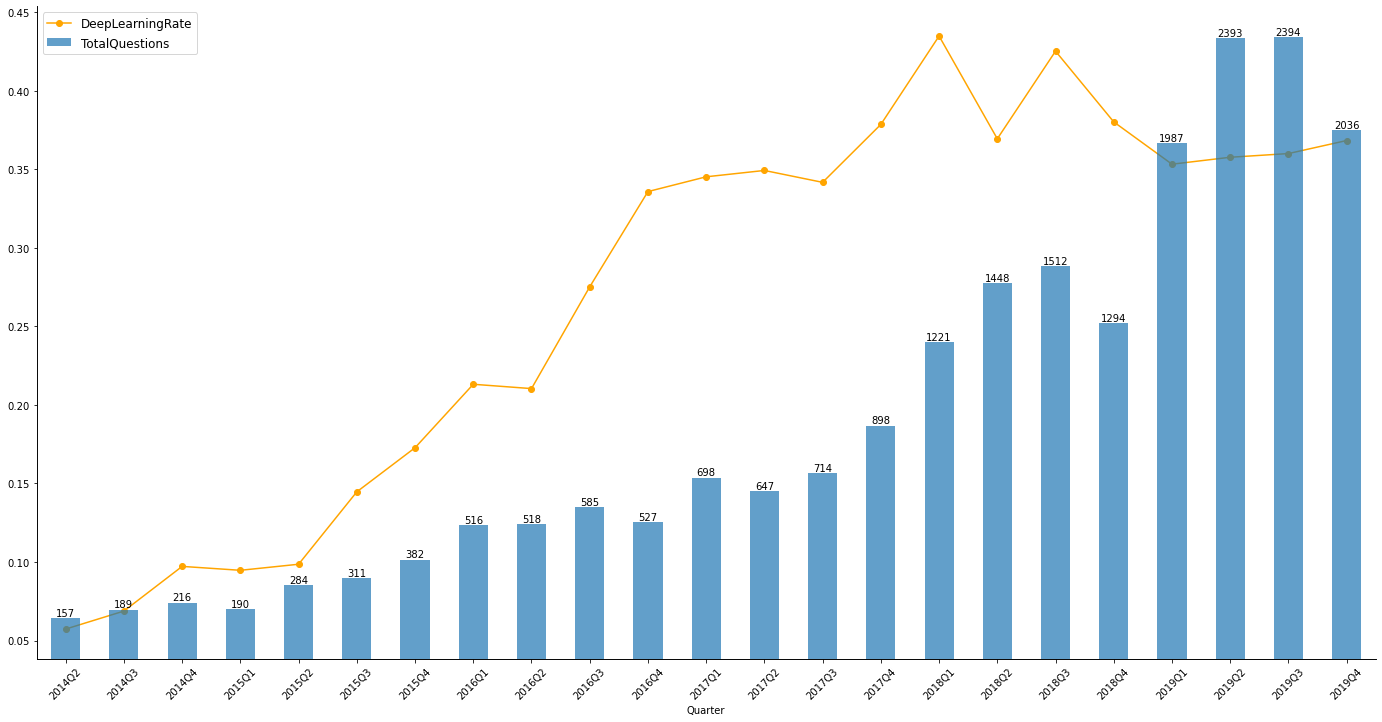

In [29]:
ax1 = quarterly.plot(
        x="Quarter",
        y="DeepLearningRate",
        kind="line",
        linestyle="-",
        marker="o",
        color="orange",
        figsize=(24,12)
)

ax2 = quarterly.plot(
        x="Quarter",
        y="TotalQuestions",
        kind="bar",
        ax=ax1,
        secondary_y=True,
        alpha=0.7,
        rot=45
)

for i,txt in enumerate(quarterly["TotalQuestions"]):
    ax2.text(i, txt, str(txt), ha="center", va="bottom")

xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(
    handles = handles1 + handles2,
    labels = labels1 + labels2,
    loc="upper left",
    prop={"size": 12}
)

for ax in (ax1, ax2):
    for z in ("top", "right"):
        ax.spines[z].set_visible(False)
        ax.tick_params(right=False, labelright=False)

# Conclusion

Based on our data, interest in deep learning seems to be plateauing.  There was a large trending interest when the Data Science Stack Exchange first started.  However, there is no evidence that interest in deep learning is on the decline.